Boxplot comparison of Sentinel-1 backscatter (VV/VH)  
between 2023–24 and 2024–25 winter seasons at Kingman Farm.  

@License: MIT  
@author: Minsun

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

1. Load Sentinel-1 extracted backscatter data  
The Sentinel-1_backscatter files were originally GeoTIFF radar images, but I extracted the values into Excel format to make them smaller and easier to handle. Each column represents pixel coordinates, and the values are radar backscatter. In general, wet snow usually gives lower backscatter than dry snow.
----------------------------------------------------------------------------------
   VV: signal transmitted and received vertically  
   VH: signal transmitted vertically and received horizontally  
   These two polarizations respond differently to surface conditions such as moisture, roughness, or vegetation, which  helps us interpret the radar observations.

In [15]:
data_dir = Path(".")

df_VH_62 = pd.read_csv(data_dir / "Sentinel-1_backscatter"/ "extracted_backscatters_VH_path_62.csv", index_col="date", parse_dates=True)
df_VV_62 = pd.read_csv(data_dir /"Sentinel-1_backscatter"/ "extracted_backscatters_VV_path_62.csv", index_col="date", parse_dates=True)

# Convert to dB
df_VV_62 = 10 * np.log10(df_VV_62.where(df_VV_62 > 0))
df_VH_62 = 10 * np.log10(df_VH_62.where(df_VH_62 > 0))

In [16]:
# Define winter periods
season1 = (df_VV_62.index >= "2023-10-01") & (df_VV_62.index <= "2024-05-31")
season2 = (df_VV_62.index >= "2024-10-01") & (df_VV_62.index <= "2025-05-31")

dates_s1 = df_VV_62.index[season1]
dates_s2 = df_VV_62.index[season2]

vv_s1 = [df_VV_62.loc[d].dropna().values for d in dates_s1]
vh_s1 = [df_VH_62.loc[d].dropna().values for d in dates_s1]
vv_s2 = [df_VV_62.loc[d].dropna().values for d in dates_s2]
vh_s2 = [df_VH_62.loc[d].dropna().values for d in dates_s2]

C:\Users\MING\AppData\Local\Temp\ipykernel_14928\3683612410.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(loc="upper right")


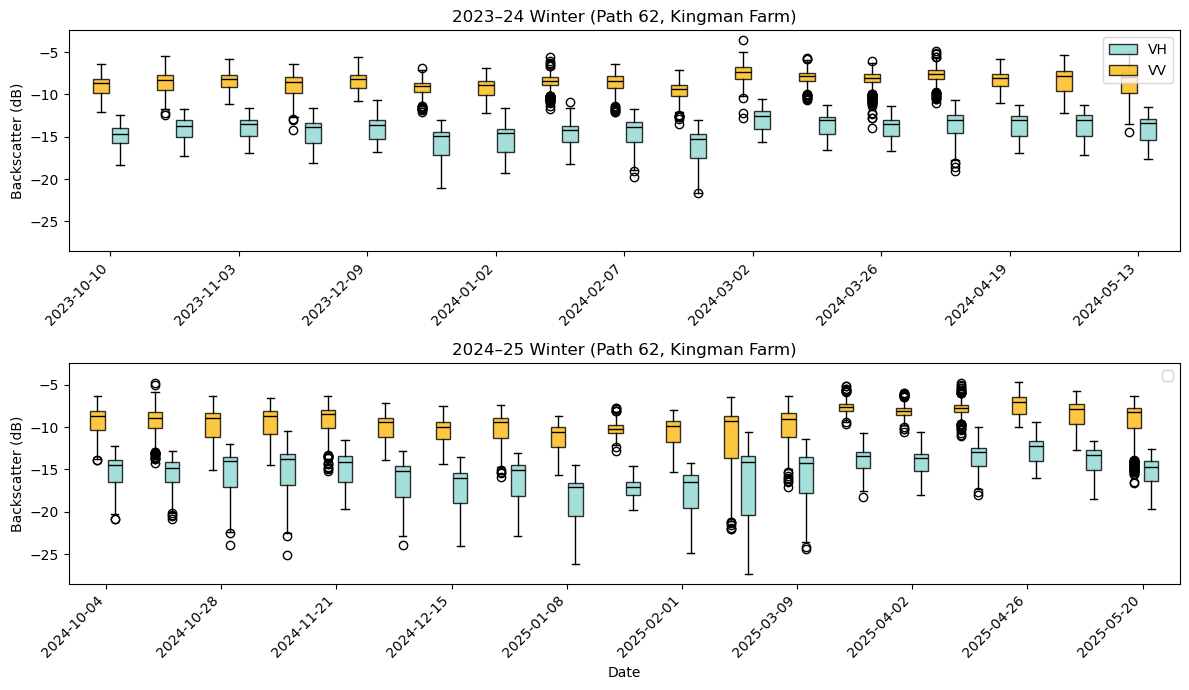

In [17]:
# boxplots 

fig, axes = plt.subplots(2, 1, figsize=(12, 7), sharey=True)

# ---- (1) 2023–24 ----
x_s1 = np.arange(len(dates_s1))
axes[0].boxplot(
    vh_s1, positions=x_s1 + 0.15, widths=0.25, patch_artist=True,
    boxprops=dict(facecolor="#8FD8D2", edgecolor="black", alpha=0.8),
    medianprops=dict(color="black"),label="VH")
axes[0].boxplot(
    vv_s1, positions=x_s1 - 0.15, widths=0.25, patch_artist=True,
    boxprops=dict(facecolor="#FDB913", edgecolor="black", alpha=0.8),
    medianprops=dict(color="black"),label="VV")
axes[0].set_title("2023–24 Winter (Path 62, Kingman Farm)")
axes[0].set_ylabel("Backscatter (dB)")
axes[0].legend(loc="upper right")

# ---- (2) 2024–25 ----
x_s2 = np.arange(len(dates_s2))
axes[1].boxplot(
    vh_s2, positions=x_s2 + 0.15, widths=0.25, patch_artist=True,
    boxprops=dict(facecolor="#8FD8D2", edgecolor="black", alpha=0.8),
    medianprops=dict(color="black"))
axes[1].boxplot(
    vv_s2, positions=x_s2 - 0.15, widths=0.25, patch_artist=True,
    boxprops=dict(facecolor="#FDB913", edgecolor="black", alpha=0.8),
    medianprops=dict(color="black"))
axes[1].set_title("2024–25 Winter (Path 62, Kingman Farm)")
axes[1].set_ylabel("Backscatter (dB)")
axes[1].set_xlabel("Date")
axes[1].legend(loc="upper right")

# ---- X-axis labels ----
for ax, dates in zip(axes, [dates_s1, dates_s2]):
    ax.set_xticks(np.arange(len(dates))[::2])
    ax.set_xticklabels([d.strftime("%Y-%m-%d") for d in dates[::2]], rotation=45, ha="right")

plt.tight_layout()
plt.show()


VH backscatter values are much lower overall. However, both VV and VH show similar up–down variation patterns.